In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [58]:
    # outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b566/Nov-13-2024-18-00-11_0.49571946278524126_LTE_Na_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] <100])


/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [59]:
remove = [22740.0	,22832.5	]
output_trimmed = output_trimmed[~output_trimmed["wave_center"].isin(remove)]

In [60]:
output_trimmed = output_trimmed[output_trimmed["flag_warning"] == 0.0]
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,Na_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,B566_clean.txt,23348.5,23347.0,23350.0,0.5688,0.0,0.0065,6.0,0.0,0.0,7.272296,568.5836,0,0
1,B566_clean.txt,23379.0,23377.0,23381.0,0.2039,0.0,0.0273,6.0,0.0,0.0,8.757318,584.2242,0,0


In [61]:
# output_trimmed = output_trimmed.iloc[:-1]

In [62]:
X = "Na"
np.mean(output_trimmed[f"{X}_Fe"]).round(2)

np.float64(0.02)

In [63]:
(solar_abundances[X] + np.mean(output_trimmed[f"{X}_Fe"])).round(2)

np.float64(6.31)

In [6]:
np.mean(output_trimmed[f"Fe_H"]).round(2)

np.float64(-0.29)

In [7]:
(solar_abundances["Fe"] + np.mean(output_trimmed[f"Fe_H"])).round(2)

np.float64(7.21)

In [2]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]


In [5]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b566/Nov-12-2024-14-43-16_0.2563873041214465_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed.reset_index(drop=True)
output_trimmed = output_trimmed[~output_trimmed["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


4.0 0.0004158952618810537 6
5.0 0.00033556123195038203 8
6.0 0.00020513650056825435 9
7.0 0.00018223560941737848 9
8.0 0.00016384273589684174 10


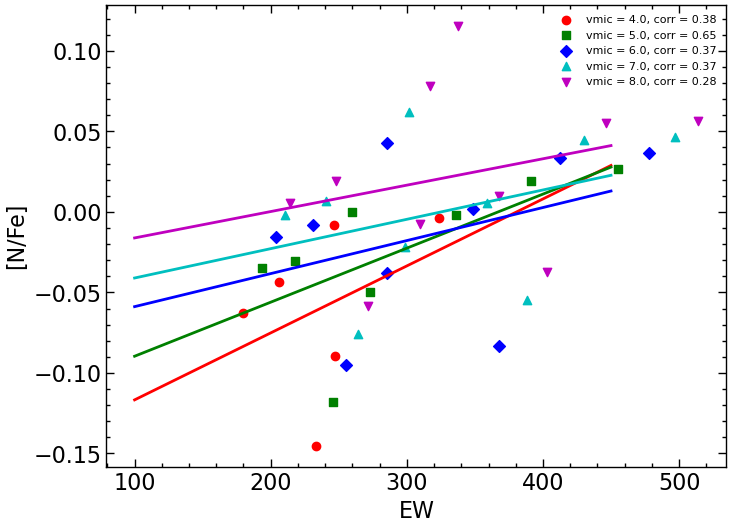

In [8]:
vmics = np.unique(output_trimmed["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_trimmed3 = output_trimmed[output_trimmed["Microturb"] == vmic]
    ews = np.array(output_trimmed3["ew"])
    nfes = np.array(output_trimmed3["O_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    # choose_idxs = np.where(np.abs(nfes - mean_nfe) < 20*std_nfe)
    choose_idxs = np.where(ews >150)
    choose_idxs = choose_idxs[0]
    choose_idxs2 = np.where(np.abs(nfes - mean_nfe) < 3*std_nfe)
    choose_idxs2 = np.where(nfes<0.2)
    choose_idxs2 = choose_idxs2[0]
    choose_idxs = np.intersect1d(choose_idxs, choose_idxs2)
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(100, 450, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [53]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b566/"
# find the newest folder in the directory
import glob
newest_folder = max(glob.glob(outpath + "/*"), key=os.path.getctime)
config_dict = load_output_data(newest_folder)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed[output_trimmed["C_Fe"] + solar_abundances['C']> 9.5]

# output_trimmed = output_trimmed[output_trimmed["C_Fe"] > 1.0]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [54]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,B566_clean.txt,22647.50,22646.0,22649.0,1.7667,0.0,1.9018,6.0,0.0,0.0,0.330793,142.4646,0,0
2,B566_clean.txt,22722.50,22721.0,22724.0,2.5000,0.0,1.5817,6.0,0.0,0.0,3.624226,92.7559,0,10000000
3,B566_clean.txt,22736.50,22735.0,22738.0,2.5000,0.0,1.2951,6.0,0.0,0.0,5.202599,160.4497,0,10000000
4,B566_clean.txt,22788.50,22787.0,22790.0,-1.0305,0.0,1.2094,6.0,0.0,0.0,4.473647,174.2096,0,0
5,B566_clean.txt,22799.00,22797.0,22801.0,2.5000,0.0,0.9697,6.0,0.0,0.0,4.463677,142.7898,0,10010000
6,B566_clean.txt,22842.00,22840.0,22844.0,-0.4464,0.0,1.3584,6.0,0.0,0.0,4.838243,142.2418,0,10000
7,B566_clean.txt,22862.50,22861.0,22864.0,0.1783,0.0,1.6182,6.0,0.0,0.0,6.063863,202.4565,0,0
8,B566_clean.txt,22869.70,22868.0,22871.4,-2.5000,0.0,1.6879,6.0,0.0,0.0,2.704701,295.0006,0,10000000
9,B566_clean.txt,23055.50,23054.0,23057.0,-1.6458,0.0,1.7429,6.0,0.0,0.0,16.149197,267.9354,0,0
10,B566_clean.txt,23126.50,23125.5,23127.5,0.9100,0.0,1.5454,6.0,0.0,0.0,10.183634,101.3628,0,10000


In [57]:
(solar_abundances['C']+np.mean(output_trimmed["C_Fe"].values)).round(3), np.std(output_trimmed["C_Fe"].values)

(np.float64(10.026), np.float64(0.25319300389667604))

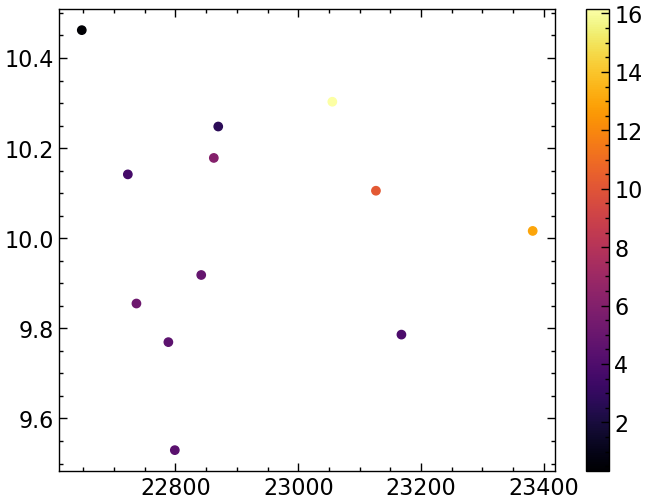

In [56]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['C_Fe']+solar_abundances['C'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [45]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b566/"
# find the newest folder in the directory
import glob
newest_folder = max(glob.glob(outpath + "/*"), key=os.path.getctime)
config_dict = load_output_data(newest_folder)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 15])
output_trimmed = output_trimmed[output_trimmed["N_Fe"] + solar_abundances['N']> 8.85]
output_trimmed = output_trimmed[output_trimmed["N_Fe"] + solar_abundances['N']< 9.3]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [46]:
np.mean(output_trimmed["chi_squared"])

np.float64(5.609776573635302)

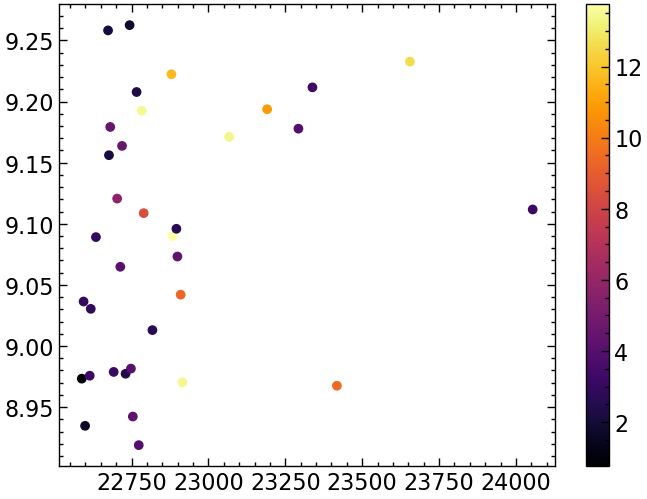

In [47]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['N_Fe']+7.98, c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [48]:
(7.98+np.mean(output_trimmed['N_Fe'])).round(3), np.std(output_trimmed['N_Fe']).round(3)

(np.float64(9.089), np.float64(0.102))

In [68]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/b566/fitlist', sep='  ')

/tmp/ipykernel_2050858/2169161214.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/b566/fitlist', sep='  ')


In [70]:
fitlist

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(N),A(O),A(Na),A(Mg),A(Fe),A(Ca),A(Si),A(S),oisorat
0,B566_clean.txt,0.0,5750.0,1.0,0.0,6.0,7.5,11.5,10.026,9.089,8.729,6.31,7.57,7.21,5.85,7.92,7.06,0.64


In [72]:
rats = np.arange(0.35, 1.,0.025)
rats = np.repeat(rats, 3)
rats

array([0.35 , 0.35 , 0.35 , 0.375, 0.375, 0.375, 0.4  , 0.4  , 0.4  ,
       0.425, 0.425, 0.425, 0.45 , 0.45 , 0.45 , 0.475, 0.475, 0.475,
       0.5  , 0.5  , 0.5  , 0.525, 0.525, 0.525, 0.55 , 0.55 , 0.55 ,
       0.575, 0.575, 0.575, 0.6  , 0.6  , 0.6  , 0.625, 0.625, 0.625,
       0.65 , 0.65 , 0.65 , 0.675, 0.675, 0.675, 0.7  , 0.7  , 0.7  ,
       0.725, 0.725, 0.725, 0.75 , 0.75 , 0.75 , 0.775, 0.775, 0.775,
       0.8  , 0.8  , 0.8  , 0.825, 0.825, 0.825, 0.85 , 0.85 , 0.85 ,
       0.875, 0.875, 0.875, 0.9  , 0.9  , 0.9  , 0.925, 0.925, 0.925,
       0.95 , 0.95 , 0.95 , 0.975, 0.975, 0.975])

In [73]:
len(rats)

78

In [74]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(N),A(O),A(Na),A(Mg),A(Fe),A(Ca),A(Si),A(S),oisorat
0,B566_clean.txt,0.0,5750.0,1.0,0.0,6.0,7.5,11.5,10.026,9.089,8.729,6.31,7.57,7.21,5.85,7.92,7.06,0.350
1,B566_clean.txt,0.0,5750.0,1.0,0.0,6.0,7.5,11.5,10.026,9.089,8.729,6.31,7.57,7.21,5.85,7.92,7.06,0.350
2,B566_clean.txt,0.0,5750.0,1.0,0.0,6.0,7.5,11.5,10.026,9.089,8.729,6.31,7.57,7.21,5.85,7.92,7.06,0.350
3,B566_clean.txt,0.0,5750.0,1.0,0.0,6.0,7.5,11.5,10.026,9.089,8.729,6.31,7.57,7.21,5.85,7.92,7.06,0.375
4,B566_clean.txt,0.0,5750.0,1.0,0.0,6.0,7.5,11.5,10.026,9.089,8.729,6.31,7.57,7.21,5.85,7.92,7.06,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,B566_clean.txt,0.0,5750.0,1.0,0.0,6.0,7.5,11.5,10.026,9.089,8.729,6.31,7.57,7.21,5.85,7.92,7.06,0.950
74,B566_clean.txt,0.0,5750.0,1.0,0.0,6.0,7.5,11.5,10.026,9.089,8.729,6.31,7.57,7.21,5.85,7.92,7.06,0.950
75,B566_clean.txt,0.0,5750.0,1.0,0.0,6.0,7.5,11.5,10.026,9.089,8.729,6.31,7.57,7.21,5.85,7.92,7.06,0.975
76,B566_clean.txt,0.0,5750.0,1.0,0.0,6.0,7.5,11.5,10.026,9.089,8.729,6.31,7.57,7.21,5.85,7.92,7.06,0.975


In [76]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/b566/fitlist_comb', sep=' ', index=False)

In [105]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b566/Nov-12-2024-04-00-05_0.011757073607746915_LTE_O_1D/output'
# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-23-13-22_0.35833114159931434_LTE_O_1D/output"
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/c38/Oct-18-2024-13-33-04_0.8528135827301694_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [106]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [107]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(-0.168078564907935)

In [108]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
rvs = []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    # sort by chi squared
    subdf.sort_values(by='red_chi_squared', inplace=True)
    subdf = subdf.iloc[:2]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    rvs.append(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

/tmp/ipykernel_1378416/608770673.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.sort_values(by='red_chi_squared', inplace=True)


0.64 0.35 -0.23


Text(0.5, 0, '16O/18O ratio')

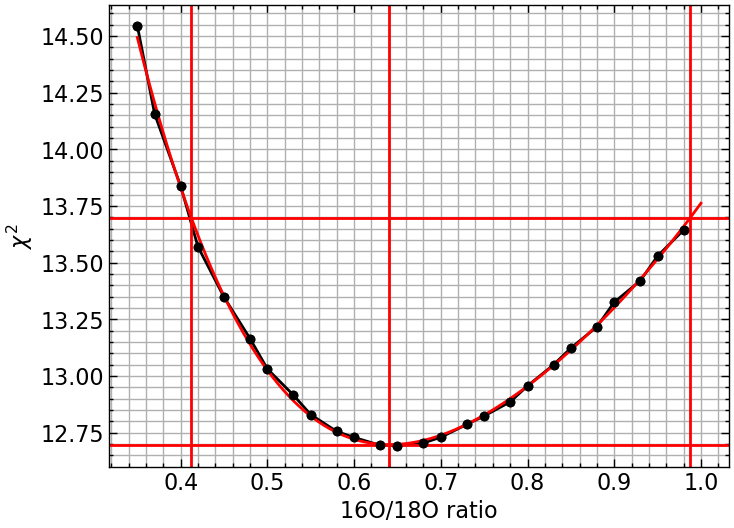

In [110]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4)
x = np.linspace(0.35,1.0,1000)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


0.608 -0.105 0.101


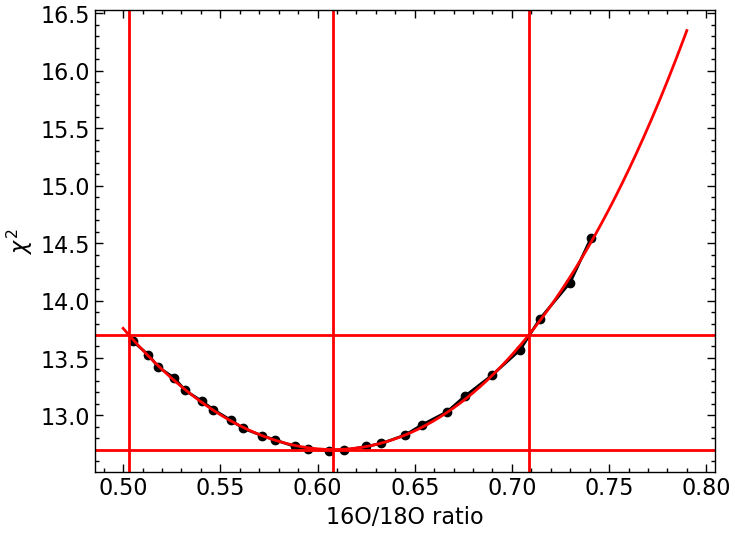

In [112]:
o18rats = 1/(1+rats)
plt.plot(o18rats, chis, 'ko-')
p = np.polyfit(o18rats, chis, 4)

# Evaluate the polynomial fit on a logarithmic scale
x = np.linspace(0.5, 0.79, 500)
y = np.polyval(p, x)

# Convert x back to the original scale for plotting
# x_original = np.exp(x)

# Plot the polynomial fit
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')

# Find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y - ybound)
idx = np.where(diff == np.min(diff))
# Find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx] - xfit).round(3), (x[idx2] - xfit).round(3)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')

print(xfit[0].round(3), xbounds[0][0], xbounds[1][0])

# Label the axes
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# plt.xscale('log')
# xs = np.linspace(np.log(300), np.log(800), 10)
# plt.plot(np.exp(xs), np.polyval(p, (xs)), 'k.')
plt.show()

<ErrorbarContainer object of 3 artists>

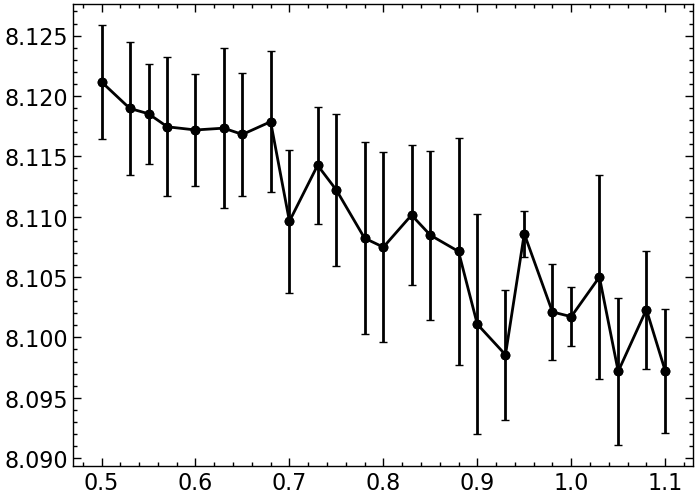

In [72]:
plt.plot(rats, np.array(oabunds)+8.77, 'ko-')
plt.errorbar(rats, np.array(oabunds)+8.77, yerr=doabunds, fmt='ko', capsize=3)
# plt.axhline(8.695)
# # plt.axhline(8.81, color='r')
# plt.axhline(8.695-0.084, color='r')
# plt.axhline(8.81+0.1, color='r')
# plt.axvline(0.52)

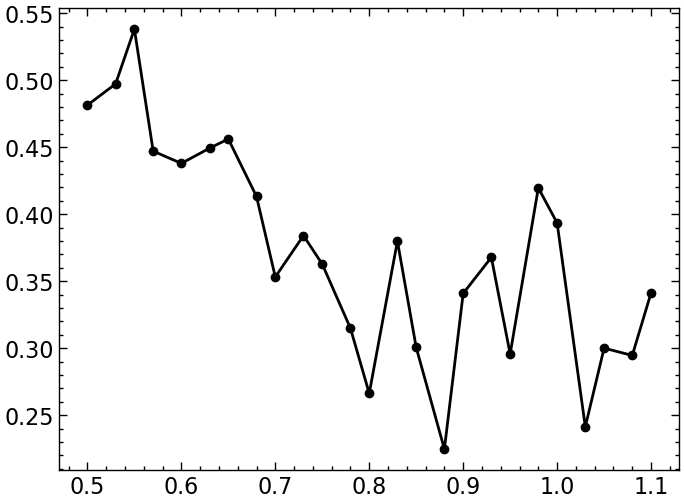

In [76]:
plt.plot(rats, rvs, 'ko-')

In [77]:
np.min(rvs), np.max(rvs)

(np.float64(0.22470436065156388), np.float64(0.5381389820872242))

In [65]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b566/"
# find the newest folder in the directory
import glob
newest_folder = max(glob.glob(outpath + "/*"), key=os.path.getctime)
config_dict = load_output_data(newest_folder)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 30])
output_trimmed = output_trimmed[output_trimmed["O_Fe"] + solar_abundances['O'] > 8.5]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


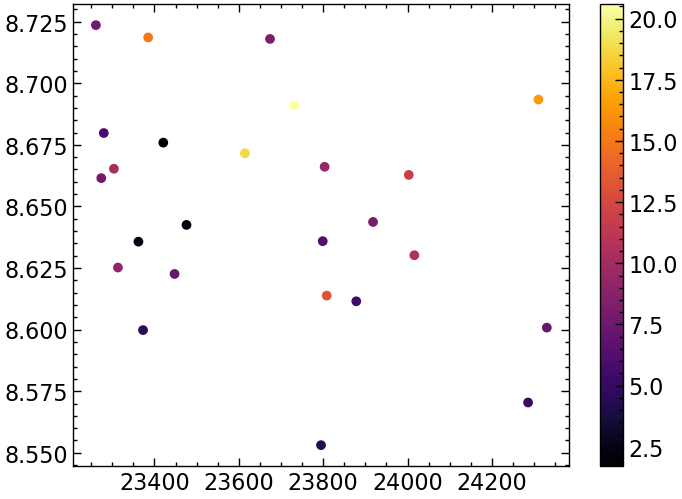

In [66]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [67]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.649), np.float64(0.043))

In [97]:
np.mean(output_trimmed['O_Fe'])

np.float64(-0.05362962962962964)

In [2]:
def printexp(n, exp, filt):
    strn = f"{exp}+"*n
    strn = strn[:-1]
    strf = f"{filt}+"*n
    strf = strf[:-1]
    print(strn)
    print(strf)

In [19]:
printexp(10, 5, "r")

5+5+5+5+5+5+5+5+5+5
r+r+r+r+r+r+r+r+r+r


sudo python make_too.py -ra '16:03:18.0' -dec '1:51:46.0' -ra_rate '0.162' -dec_rate '0.014' -filt 'r+r+r+r+r+r+r+r+r+r' -exp '2+2+2+2+2+2+2+2+2+2' -noexp '20+20+20+20+20+20+20+20+20+20' -name 'CK23A030' -p '7500' -obs_type 'NS' -domesleep '50' -d '20241018' -iit_obs 'advait' -hanle_obs 'kaysang' -stack 'Y' -propnums 'P06'

In [ ]:
sudo python make_too.py -ra '15:57:38.593s' -dec '+01:44:30.128' -ra_rate '0.162' -dec_rate '0.014' -filt 'r+r+r+r+r+r+r+r+r+r' -exp '5+5+5+5+5+5+5+5+5+5' -noexp '5+5+5+5+5+5+5+5+5+5' -name 'CK23A030' -p '7900' -obs_type 'NS' -domesleep '50' -d '20241018' -iit_obs 'advait' -hanle_obs 'kaysang' -stack 'Y' -propnums 'P06'

In [17]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Define the two RA/Dec pairs in HMS/DMS format
coord1 = SkyCoord(ra='16h03m18.0s', dec='1d51m46.0s', frame='icrs')
coord2 = SkyCoord(ra='16h08m57.407s', dec='+01d59m01.872s', frame='icrs')

# Calculate the total angular separation between the two coordinates
total_separation = coord1.separation(coord2)

# Calculate the separation in RA and Dec individually
ra_diff = coord2.ra - coord1.ra  # This will be an astropy Quantity
dec_diff = coord2.dec - coord1.dec  # This will be an astropy Quantity

# Convert RA difference to degrees
ra_diff_deg = ra_diff.to(u.deg)

# Print the results
print(f"Total angular separation: {total_separation.deg:.6f} degrees")
print(f"RA difference: {ra_diff_deg:.6f} degrees")
print(f"Dec difference: {dec_diff:.6f}")

#  subtract the difference from coord1

coord1_new = SkyCoord(ra=coord1.ra - ra_diff, dec=coord1.dec - dec_diff, frame='icrs')
print(coord1_new.to_string('hmsdms'))


Total angular separation: 1.418575 degrees
RA difference: 1.414196 deg degrees
Dec difference: 0.121076 deg
15h57m38.593s +01d44m30.128s
